### Step 1 Import Libraries

In [47]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Step 2 Importing dataset

In [48]:
df = pd.read_excel('a1_Dataset_10Percent.xlsx')
df=df.drop(['ID'],axis=1)

### Step 3 Exploratory Data Analysis and Data cleaning

In [49]:
df.head(10)

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,5.0,NaN,NaN,NaN,NaN,NaN,Tin,0.01,5.0,0
1,15.0,NaN,NaN,M,NaN,NaN,Gold,8000.00,5.0,1
2,NaN,NaN,NaN,M,Midlands,East,Tin,0.01,NaN,1
3,8.0,28.0,NaN,F,NaN,NaN,Tin,0.01,NaN,1
4,14.0,67.0,NaN,NaN,NaN,NaN,Tin,0.01,7.0,0
5,NaN,65.0,NaN,F,NaN,NaN,Silver,3000.00,3.0,0
6,7.0,41.0,NaN,NaN,NaN,NaN,Tin,0.01,7.0,0
7,13.0,50.0,NaN,F,NaN,NaN,Tin,0.01,5.0,1
8,8.0,36.0,NaN,F,NaN,NaN,Tin,0.01,9.0,0
9,NaN,NaN,NaN,M,Midlands,Ulster,Silver,2000.00,1.0,0


In [50]:
df.tail(10)

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
22213,14.0,33.0,F,M,South East,London,Tin,0.01,8.0,1
22214,7.0,41.0,C,M,South West,S West,Tin,0.01,8.0,1
22215,9.0,62.0,B,M,South East,London,Tin,0.01,8.0,0
22216,3.0,54.0,E,F,South East,S & S East,Platinum,23000.00,3.0,1
22217,14.0,43.0,C,M,Midlands,Midlands,Silver,3336.92,2.0,1
22218,13.0,49.0,B,M,South East,London,Silver,500.00,9.0,0
22219,13.0,65.0,B,F,South East,London,Silver,1500.00,5.0,0
22220,15.0,73.0,D,U,South East,S & S East,Gold,6053.06,12.0,0
22221,9.0,70.0,B,F,North,Yorkshire,Gold,6000.00,5.0,0
22222,11.0,66.0,B,F,North,N West,Silver,5000.00,5.0,0


In [51]:
df.shape

(22223, 10)

In [52]:
df.columns

Index(['DemAffl', 'DemAge', 'DemClusterGroup', 'DemGender', 'DemReg',
       'DemTVReg', 'LoyalClass', 'LoyalSpend', 'LoyalTime', 'TargetBuy'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DemAffl          21138 non-null  float64
 1   DemAge           20715 non-null  float64
 2   DemClusterGroup  21549 non-null  object 
 3   DemGender        19711 non-null  object 
 4   DemReg           21758 non-null  object 
 5   DemTVReg         21758 non-null  object 
 6   LoyalClass       22223 non-null  object 
 7   LoyalSpend       22223 non-null  float64
 8   LoyalTime        21942 non-null  float64
 9   TargetBuy        22223 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 1.7+ MB


In [54]:
df.describe(include='object')

,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass
count,21549,19711,21758,21758,22223
unique,7,3,5,13,4
top,C,F,South East,London,Silver
freq,4566,12149,8634,6189,8572


In [55]:
for col in df.describe(include='object').columns:
        print(col)
        print(df[col].unique())
        print('-'*50)

DemClusterGroup
[nan 'B' 'E' 'D' 'F' 'C' 'A' 'U']
--------------------------------------------------
DemGender
[nan 'M' 'F' 'U']
--------------------------------------------------
DemReg
[nan 'Midlands' 'South East' 'North' 'South West' 'Scottish']
--------------------------------------------------
DemTVReg
[nan 'East' 'Ulster' 'S & S East' 'Yorkshire' 'London' 'Wales & West'
 'N West' 'Midlands' 'S West' 'N East' 'N Scot' 'C Scotland' 'Border']
--------------------------------------------------
LoyalClass
['Tin' 'Gold' 'Silver' 'Platinum']
--------------------------------------------------


In [56]:
df.isna().sum()

DemAffl            1085
DemAge             1508
DemClusterGroup     674
DemGender          2512
DemReg              465
DemTVReg            465
LoyalClass            0
LoyalSpend            0
LoyalTime           281
TargetBuy             0
dtype: int64

#### filling missing values with mean/mode

In [57]:
df['DemAffl']=df['DemAffl'].fillna(df['DemAffl'].mode()[0])
df['DemAge']=df['DemAge'].fillna(df['DemAge'].mode()[0])
df['DemClusterGroup']=df['DemClusterGroup'].fillna(df['DemClusterGroup'].mode()[0])
df['DemGender']=df['DemGender'].fillna(df['DemGender'].mode()[0])
df['DemReg']=df['DemReg'].fillna(df['DemReg'].mode()[0])
df['DemTVReg']=df['DemTVReg'].fillna(df['DemTVReg'].mode()[0])
df['LoyalTime']=df['LoyalTime'].fillna(df['LoyalTime'].mean())

#### explore missing values post missing value fix

In [58]:
df.isna().sum()

DemAffl            0
DemAge             0
DemClusterGroup    0
DemGender          0
DemReg             0
DemTVReg           0
LoyalClass         0
LoyalSpend         0
LoyalTime          0
TargetBuy          0
dtype: int64

#### review the dataset

In [59]:
df.head(10)

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,5.0,51.0,C,F,South East,London,Tin,0.01,5.00000,0
1,15.0,51.0,C,M,South East,London,Gold,8000.00,5.00000,1
2,8.0,51.0,C,M,Midlands,East,Tin,0.01,6.56467,1
3,8.0,28.0,C,F,South East,London,Tin,0.01,6.56467,1
4,14.0,67.0,C,F,South East,London,Tin,0.01,7.00000,0
5,8.0,65.0,C,F,South East,London,Silver,3000.00,3.00000,0
6,7.0,41.0,C,F,South East,London,Tin,0.01,7.00000,0
7,13.0,50.0,C,F,South East,London,Tin,0.01,5.00000,1
8,8.0,36.0,C,F,South East,London,Tin,0.01,9.00000,0
9,8.0,51.0,C,M,Midlands,Ulster,Silver,2000.00,1.00000,0


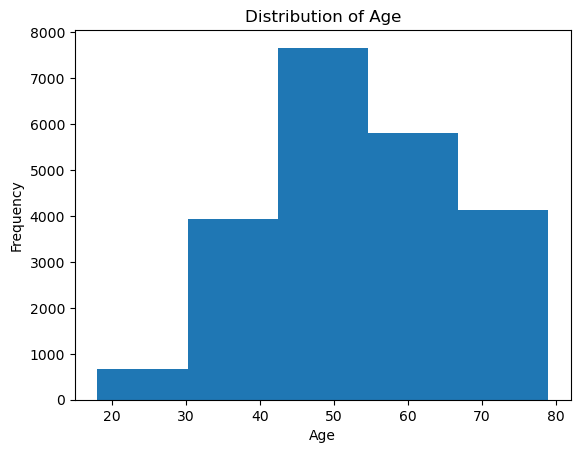

In [60]:
plt.hist(df['DemAge'], bins=5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


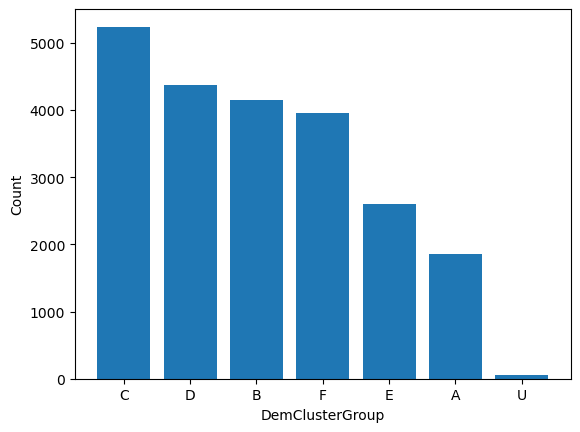

In [61]:
group_counts = df['DemClusterGroup'].value_counts()

# Create a bar chart of the group counts
plt.bar(group_counts.index, group_counts.values)
plt.xlabel('DemClusterGroup')
plt.ylabel('Count')

# Show the plot
plt.show()

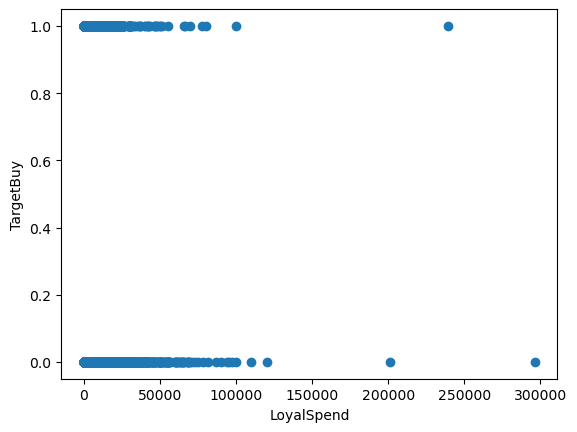

In [62]:
import matplotlib.pyplot as plt

# Create a scatter plot of LoyalSpend vs TargetBuy
plt.scatter(df['LoyalSpend'], df['TargetBuy'])
plt.xlabel('LoyalSpend')
plt.ylabel('TargetBuy')

# Show the plot
plt.show()

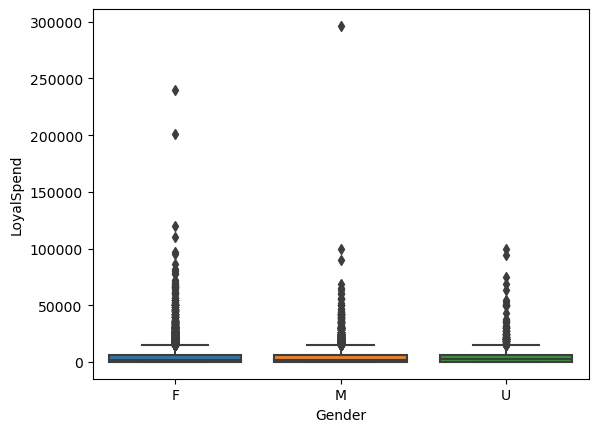

In [63]:
import seaborn as sns
# Create a boxplot of DemGender vs LoyalSpend
sns.boxplot(x='DemGender', y='LoyalSpend', data=df)

# Set the axis labels
plt.xlabel('Gender')
plt.ylabel('LoyalSpend')

# Show the plot
plt.show()

In [65]:
dropm= (df['DemGender'] == 'M') & (df['LoyalSpend'] > 250000)

# Drop the rows that meet the criteria using boolean indexing
df = df.drop(df[dropm].index)


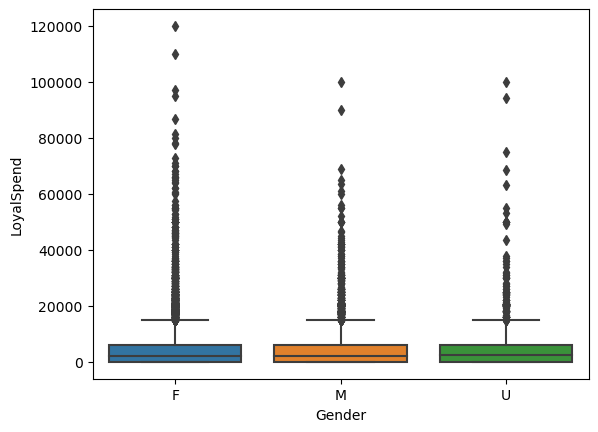

In [66]:
import seaborn as sns
# Create a boxplot of DemGender vs LoyalSpend
sns.boxplot(x='DemGender', y='LoyalSpend', data=df)

# Set the axis labels
plt.xlabel('Gender')
plt.ylabel('LoyalSpend')

# Show the plot
plt.show()

#### converting the data to numeric values

In [67]:


number = LabelEncoder()

df['DemClusterGroup'] = number.fit_transform(df['DemClusterGroup'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

df['DemGender'] = number.fit_transform(df['DemGender'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

df['DemReg'] = number.fit_transform(df['DemReg'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

df['DemTVReg'] = number.fit_transform(df['DemTVReg'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

df['LoyalClass'] = number.fit_transform(df['LoyalClass'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
integer_mapping


{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'U': 6}
{'F': 0, 'M': 1, 'U': 2}
{'Midlands': 0, 'North': 1, 'Scottish': 2, 'South East': 3, 'South West': 4}
{'Border': 0, 'C Scotland': 1, 'East': 2, 'London': 3, 'Midlands': 4, 'N East': 5, 'N Scot': 6, 'N West': 7, 'S & S East': 8, 'S West': 9, 'Ulster': 10, 'Wales & West': 11, 'Yorkshire': 12}


{'Gold': 0, 'Platinum': 1, 'Silver': 2, 'Tin': 3}

#### review the dataset

In [68]:
df.head(10)

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,5.0,51.0,2,0,3,3,3,0.01,5.00000,0
1,15.0,51.0,2,1,3,3,0,8000.00,5.00000,1
2,8.0,51.0,2,1,0,2,3,0.01,6.56467,1
3,8.0,28.0,2,0,3,3,3,0.01,6.56467,1
4,14.0,67.0,2,0,3,3,3,0.01,7.00000,0
5,8.0,65.0,2,0,3,3,2,3000.00,3.00000,0
6,7.0,41.0,2,0,3,3,3,0.01,7.00000,0
7,13.0,50.0,2,0,3,3,3,0.01,5.00000,1
8,8.0,36.0,2,0,3,3,3,0.01,9.00000,0
9,8.0,51.0,2,1,0,10,2,2000.00,1.00000,0


####  Export the clean dataset

In [69]:
df.to_excel("2.Dataset_clean.xlsx")

#### Calculating VIF

In [70]:

def calc_vif(z):
    vif = pd.DataFrame()
    vif["variables"] = z.columns
    vif["VIF"] = [variance_inflation_factor(z.values, i) if is_numeric_dtype(z.iloc[:, i]) else np.nan for i in range(z.shape[1])]
    return(vif)

In [71]:
z = df.iloc[:,0:9]
calc_vif(z)

,variables,VIF
0,DemAffl,6.285445
1,DemAge,10.939997
2,DemClusterGroup,3.663453
3,DemGender,1.435614
4,DemReg,2.475655
5,DemTVReg,3.752889
6,LoyalClass,4.041916
7,LoyalSpend,2.046551
8,LoyalTime,3.153979


## Step 4 Building Model

In [72]:
y = df.iloc[:,9].values
X = df.iloc[:,0:9].values

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [76]:
classifier =  LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [77]:
joblib.dump(classifier, './c2_Classifier_LoyalCustomers')

confusion_matrix(y_test,y_pred)

array([[3170,  202],
       [ 697,  375]], dtype=int64)

In [78]:
accuracy_score(y_test, y_pred)

0.7977047704770477

In [79]:
predictions = classifier.predict_proba(X_test)

# writing model output file

df_prediction_prob = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1'])
df_test_dataset = pd.DataFrame(y_test,columns= ['Actual Outcome'])
df_x_test = pd.DataFrame(X_test)

dfx=pd.concat([df_x_test,df_test_dataset, df_prediction_prob], axis=1)

dfx.to_excel("c1_ModelOutput_10Percent.xlsx")

dfx.head()

,0,1,2,3,4,5,6,7,8,Actual Outcome,prob_0,prob_1
0,15.0,38.0,4.0,0.0,0.0,4.0,2.0,19.39,10.0,1,0.190104,0.809896
1,9.0,44.0,0.0,0.0,3.0,3.0,2.0,4600.00,5.0,0,0.639449,0.360551
2,15.0,75.0,2.0,1.0,3.0,8.0,0.0,6000.00,2.0,1,0.821403,0.178597
3,11.0,52.0,4.0,0.0,1.0,7.0,3.0,0.01,5.0,0,0.601676,0.398324
4,8.0,68.0,3.0,0.0,3.0,3.0,0.0,6000.00,1.0,1,0.876156,0.123844


## STEP 5: Using the model to predict the prob-buyer

In [80]:
df = pd.read_excel('a2_Dataset_90Percent.xlsx')
print(df.head())
# explore missing values

     ID  DemAffl  DemAge DemClusterGroup DemGender    DemReg      DemTVReg  \
0   140     10.0    76.0               C         U  Midlands  Wales & West   
1   620      4.0    49.0               D         U  Midlands  Wales & West   
2   868      5.0    70.0               D         F  Midlands  Wales & West   
3  1120     10.0    65.0               F         M  Midlands      Midlands   
4  2313     11.0    68.0               A         F  Midlands      Midlands   

  LoyalClass  LoyalSpend  LoyalTime  
0       Gold    16000.00        4.0  
1       Gold     6000.00        5.0  
2     Silver        0.02        8.0  
3        Tin        0.01        7.0  
4        Tin        0.01        8.0  


In [81]:
df.isna().sum()

ID                   0
DemAffl             48
DemAge              67
DemClusterGroup     28
DemGender          114
DemReg              18
DemTVReg            18
LoyalClass           0
LoyalSpend           0
LoyalTime           15
dtype: int64

In [82]:
# filling missing values with mean/mode*
df['DemAffl']=df['DemAffl'].fillna(df['DemAffl'].mode()[0])
df['DemAge']=df['DemAge'].fillna(df['DemAge'].mode()[0])
df['DemClusterGroup']=df['DemClusterGroup'].fillna(df['DemClusterGroup'].mode()[0])
df['DemGender']=df['DemGender'].fillna(df['DemGender'].mode()[0])
df['DemReg']=df['DemReg'].fillna(df['DemReg'].mode()[0])
df['DemTVReg']=df['DemTVReg'].fillna(df['DemTVReg'].mode()[0])
df['LoyalTime']=df['LoyalTime'].fillna(df['LoyalTime'].mean())

print(df.isna().sum())


ID                 0
DemAffl            0
DemAge             0
DemClusterGroup    0
DemGender          0
DemReg             0
DemTVReg           0
LoyalClass         0
LoyalSpend         0
LoyalTime          0
dtype: int64


In [83]:

number = LabelEncoder()

df['DemClusterGroup'] = number.fit_transform(df['DemClusterGroup'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

df['DemGender'] = number.fit_transform(df['DemGender'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

df['DemReg'] = number.fit_transform(df['DemReg'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

df['DemTVReg'] = number.fit_transform(df['DemTVReg'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

df['LoyalClass'] = number.fit_transform(df['LoyalClass'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

print(df.head())


{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'U': 6}
{'F': 0, 'M': 1, 'U': 2}
{'Midlands': 0, 'North': 1, 'Scottish': 2, 'South East': 3, 'South West': 4}
{'Border': 0, 'C Scotland': 1, 'East': 2, 'London': 3, 'Midlands': 4, 'N East': 5, 'N Scot': 6, 'N West': 7, 'S & S East': 8, 'S West': 9, 'Ulster': 10, 'Wales & West': 11, 'Yorkshire': 12}
{'Gold': 0, 'Platinum': 1, 'Silver': 2, 'Tin': 3}
     ID  DemAffl  DemAge  DemClusterGroup  DemGender  DemReg  DemTVReg  \
0   140     10.0    76.0                2          2       0        11   
1   620      4.0    49.0                3          2       0        11   
2   868      5.0    70.0                3          0       0        11   
3  1120     10.0    65.0                5          1       0         4   
4  2313     11.0    68.0                0          0       0         4   

   LoyalClass  LoyalSpend  LoyalTime  
0           0    16000.00        4.0  
1           0     6000.00        5.0  
2           2        0.02        8.0  


In [84]:
x_fresh = df.iloc[:, 1:10].values

classifier = joblib.load('c2_Classifier_LoyalCustomers')

y_pred = classifier.predict(x_fresh)
print(y_pred)

predictions = classifier.predict_proba(x_fresh)
print(predictions)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 

In [86]:
# writing model output file
df_prediction_prob = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1'])
dfx=pd.concat([df,df_prediction_prob], axis=1)
dfx.to_excel("d2_BuyProb_90Percent.xlsx")
dfx.head()

,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,prob_0,prob_1
0,140,10.0,76.0,2,2,0,11,0,16000.00,4.0,0.974670,0.025330
1,620,4.0,49.0,3,2,0,11,0,6000.00,5.0,0.969760,0.030240
2,868,5.0,70.0,3,0,0,11,2,0.02,8.0,0.940952,0.059048
3,1120,10.0,65.0,5,1,0,4,3,0.01,7.0,0.890214,0.109786
4,2313,11.0,68.0,0,0,0,4,3,0.01,8.0,0.784724,0.215276
